Develop a graph which represents the public transport network of a city of your choice. Some cities have extensive public transport networks. In such case, represent minimum 3 lines with minimum 4 stations on each line. When visualising the network, use different colours for the different lines and their corresponding stations. Provide attributes to the edges which correspond to the distances between stations and visualise them. If the actual distances between the stations are not available, approximate them by using online map services. Visualise the names of the stations.


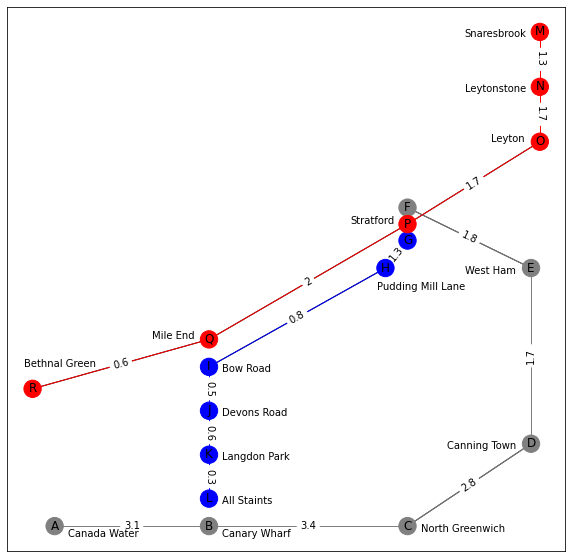

In [384]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a graph object
MyGraph = nx.Graph()

# Add nodes
# Grey Line
MyGraph.add_node('A', npos=(20, 10), ccn='#808080')
MyGraph.add_node('B', npos=(55, 10), ccn='#808080')
MyGraph.add_node('C', npos=(100, 10), ccn='#808080')
MyGraph.add_node('D', npos=(128, 25), ccn='#808080')
MyGraph.add_node('E', npos=(128, 57), ccn='#808080')
MyGraph.add_node('F', npos=(100, 68), ccn='#808080')

# blue Line
MyGraph.add_node('G', npos=(100, 62), ccn='#0000FF')
MyGraph.add_node('H', npos=(95, 57), ccn='#0000FF')
MyGraph.add_node('I', npos=(55, 39), ccn='#0000FF')
MyGraph.add_node('J', npos=(55, 31), ccn='#0000FF')
MyGraph.add_node('K', npos=(55, 23), ccn='#0000FF')
MyGraph.add_node('L', npos=(55, 15), ccn='#0000FF')

# Red Line
MyGraph.add_node('M', npos=(130, 100), ccn='#FF0000')
MyGraph.add_node('N', npos=(130, 90), ccn='#FF0000')
MyGraph.add_node('O', npos=(130, 80), ccn='#FF0000')
MyGraph.add_node('P', npos=(100, 65), ccn='#FF0000')
MyGraph.add_node('Q', npos=(55, 44), ccn='#FF0000')
MyGraph.add_node('R', npos=(15, 35), ccn='#FF0000')

# Connect nodes
# Grey Line
MyGraph.add_edge('A', 'B', cce='#808080',weight = 3.1)
MyGraph.add_edge('B', 'C', cce='#808080',weight = 3.4)
MyGraph.add_edge('C', 'D', cce='#808080',weight = 2.8)
MyGraph.add_edge('D', 'E', cce='#808080',weight = 1.7)
MyGraph.add_edge('E', 'F', cce='#808080',weight = 1.8)
# Blue Line
#MyGraph.add_edge('F', 'G', cce='#FF4500')
MyGraph.add_edge('G', 'H', cce='#0000FF',weight = 1.3)
MyGraph.add_edge('H', 'I', cce='#0000FF',weight = 0.8)
MyGraph.add_edge('I', 'J', cce='#0000FF',weight = 0.5)
MyGraph.add_edge('J', 'K', cce='#0000FF',weight = 0.6)
MyGraph.add_edge('K', 'L', cce='#0000FF',weight = 0.3)
# Red Line
#MyGraph.add_edge('L', 'M', cce='#0000FF')
MyGraph.add_edge('M', 'N', cce='#FF0000',weight = 1.3)
MyGraph.add_edge('N', 'O', cce='#FF0000',weight = 1.7)
MyGraph.add_edge('O', 'P', cce='#FF0000',weight = 1.7)
MyGraph.add_edge('P', 'Q', cce='#FF0000',weight = 2)
MyGraph.add_edge('Q', 'R', cce='#FF0000',weight = 0.6)

# Extract attributes from the graph to dictionaries
pos = nx.get_node_attributes(MyGraph, 'npos')
nodecolour = nx.get_node_attributes(MyGraph, 'ccn')
edgecolour = nx.get_edge_attributes(MyGraph, 'cce')
edgewt = nx.get_edge_attributes(MyGraph, 'weight')

# Place the dictionary values in lists
NodeList = list(nodecolour.values())
EdgeList = list(edgecolour.values())
EdgeWeight = list(edgewt.values())
# Set the size of the figure
plt.figure(figsize=(10, 10))

# Display the names of the stations
plt.text(23, 8, s='Canada Water', rotation=0)
plt.text(58, 8, s='Canary Wharf', rotation=0)
plt.text(103, 9, s='North Greenwich', rotation=0)
plt.text(109, 24, s='Canning Town', rotation=0)
plt.text(113, 56, s='West Ham', rotation=0)
plt.text(87, 65, s='Stratford', rotation=0)

plt.text(93, 53, s='Pudding Mill Lane', rotation=0) 
plt.text(58, 38, s='Bow Road', rotation=0)
plt.text(58, 30, s='Devons Road', rotation=0)
plt.text(58, 22, s='Langdon Park', rotation=0)
plt.text(58, 14, s='All Staints', rotation=0)

plt.text(113, 99, s='Snaresbrook', rotation=0)
plt.text(113, 89, s='Leytonstone', rotation=0)
plt.text(119, 80, s='Leyton', rotation=0)
plt.text(42, 44, s='Mile End', rotation=0)
plt.text(13, 39, s='Bethnal Green', rotation=0)

# Draw the nodes and the edges
nx.draw_networkx(MyGraph, pos, node_color=NodeList)
nx.draw_networkx_edges(MyGraph, pos, edge_color=EdgeList)
nx.draw_networkx_edge_labels(MyGraph, pos, edge_labels=edgewt)
# Visualise the graph
plt.show()

In [85]:
import os
os.chdir('/Users/lakshayanand/downloads')

Find the average monthly temperatures of three cities of your choice. Represent the data by using a heat map. Provide a colour scale for guidance. Allow the user to specify a threshold for the heat map. Based on this threshold value, use different base colours when representing the data points.

        City     1     2     3     4     5     6     7     8     9    10  \
0  New Delhi  14.1  17.4  22.7  28.9  32.7  33.2  31.4  30.3  29.6  26.0   
1     Mumbai  24.9  25.3  27.1  28.9  30.5  29.3  27.8  27.4  27.8  28.9   
2     London   5.2   5.3   7.6   9.9  13.3  16.5  18.7  18.5  15.7  12.0   

     11    12  
0  20.5  15.5  
1  28.4  26.5  
2   8.0   5.5  


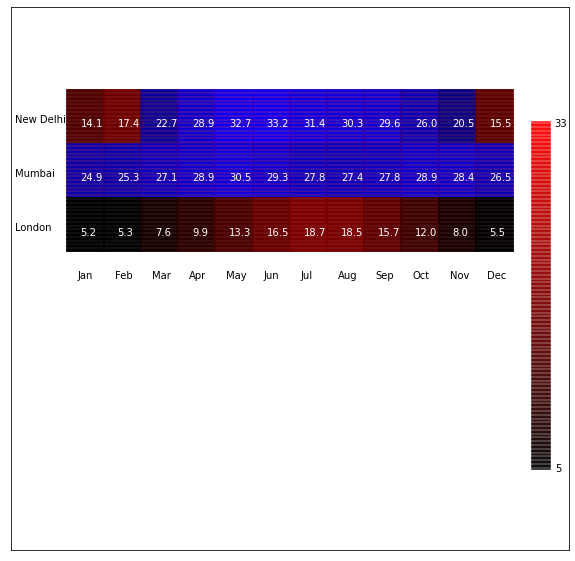

In [379]:
# This subroutine encapsulates the 'plot' method, as the most suitable for raster rendering

def DrawBox(x, y, size, r, g, b):
    if r < 0:
        r = int(0)
    if g < 0:
        g = int(0)
    if b < 0:
        b = int(0)
    if r > 255:
        r = int(255)
    if g > 255:
        g = int(255)
    if b > 255:
        b = int(255)
    for i in range(0, int(size)):
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))


# Store the dataset into a data frame
df = pd.read_csv('HeatMap.csv')
# Print the content on the screen
print(df.head(5))

# Set the plot
plt.figure(figsize=(10, 10))
plt.axis([0, 600, 0, 400])
plt.xticks([])
plt.yticks([])

Min = int(min(df.min(numeric_only=True)))
Max = int(max(df.max(numeric_only=True)))

BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)

# Generate the heat map
for i in range(0, df.shape[0]):
    for j in range(1, df.shape[1]):
        ColourCode = int(((df.values[i, j]-Min)/(Max-Min))*255)
        DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 0, 0)
        plt.text(OffsetX+20+BoxSize*j, OffsetY+300-BoxSize*i, str(df.values[i, j]), color='white')
        Threshold = int(20)
        if df.values[i, j] > Threshold:
            DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, 0, 0, ColourCode)
        if df.values[i, j] <= Threshold:
            DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 0, 0)
# Generate the scale
for i in range(0, 256):
    plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(int(i), 0, 0))
plt.text(585, 58, Min)
plt.text(585, 312, Max)


plt.text(72, 200, 'Jan')
plt.text(112, 200, 'Feb')
plt.text(152, 200, 'Mar')
plt.text(192, 200, 'Apr')
plt.text(232, 200, 'May')
plt.text(272, 200, 'Jun')
plt.text(312, 200, 'Jul')
plt.text(352, 200, 'Aug')
plt.text(392, 200, 'Sep')
plt.text(432, 200, 'Oct')
plt.text(472, 200, 'Nov')
plt.text(512, 200, 'Dec')

plt.text(5, 315, str(df.values[0, 0]))
plt.text(5, 275, str(df.values[1, 0]))
plt.text(5, 235, str(df.values[2, 0]))


plt.show()


Represent the data from Task 2 by using parallel coordinates. Use different colours for each city's average monthly temperatures.


Number of Rows:  3
Number of Columns:  12


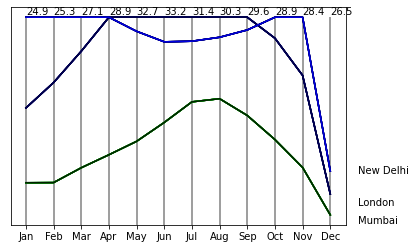

In [170]:
import numpy as np
import matplotlib.pyplot as plt



# Read dataset from CSV file
MyArray = np.genfromtxt('heatmap 3.csv', delimiter=',', dtype='float')



# Print dimension of dataset
print('Number of Rows: ', MyArray.shape[0])
print('Number of Columns: ', MyArray.shape[1])




Scale = int(30)
# Find the maximum values per column
Maximum = np.amax(MyArray, axis=0)



# Normalise to interval 0 .. 100
for i in range(0, MyArray.shape[0]):
    for j in range(0, MyArray.shape[1]-1):
        MyArray[i, j] = float(MyArray[i, j]*(100.0/Maximum[j]))



# Spine names
Name = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']



# Test for random RGB in hex
k = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
MyC = '#'
for i in range(0, 12):
    s = np.random.choice(k)
    MyC = MyC + s



plt.yticks([])



# Spines
for i in range(0, MyArray.shape[1]):
    plt.vlines(i, 0, 100, '#808080')



# Generate the parallel coordinates
for i in range(0, MyArray.shape[0]):
    if MyArray[i, 4] < float(40.0):
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + s1 + s2 + '0000'
            plt.plot(Name, MyArray[i], MyC)



for i in range(0, MyArray.shape[0]):
    if float(40.0) < MyArray[i, 4] < float(60.0):
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + '00' + s1 + s2 + '00'
            plt.plot(Name, MyArray[i], MyC)



for i in range(0, MyArray.shape[0]):
    if float(60.0) < MyArray[i, 4]:
        MyC = '#'
        for j in range(0, 6):
            s1 = np.random.choice(k)
            s2 = np.random.choice(k)
            MyC = '#' + '0000' + s1 + s2
            plt.plot(Name, MyArray[i], MyC)



plt.text(0, 101, round(Maximum[0], 2))
plt.text(1, 101, round(Maximum[1], 2))
plt.text(2, 101, round(Maximum[2], 2))
plt.text(3, 101, round(Maximum[3], 2))
plt.text(4, 101, round(Maximum[4], 2))
plt.text(5, 101, round(Maximum[5], 2))
plt.text(6, 101, round(Maximum[6], 2))
plt.text(7, 101, round(Maximum[7], 2))
plt.text(8, 101, round(Maximum[8], 2))
plt.text(9, 101, round(Maximum[9], 2))
plt.text(10, 101, round(Maximum[10], 2))
plt.text(11, 101, round(Maximum[11], 2))



plt.text(12, 25, 'New Delhi')
plt.text(12, 1, 'Mumbai')
plt.text(12, 10, 'London')



plt.show()